## Growth binary results special cases

This notebook holds the plots created for special tests (comparison of 24h to 48h, etc.) which can't be plotted with the generalized script.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from PARAMS import *
from scipy.stats import ttest_ind
%run -i PARAMS.py
from statannotations.Annotator import Annotator

### Preliminary tests to compare transfer methods

Plain CGXII without PCA.

In [3]:
test = pd.read_excel('binary_growth_results.xlsx', sheet_name='CGXlab')
test['fold'] = test[24] / test[0]
test

,strain,modus,0,24,growth,growth-%,fold
0,14,direkt,0.085,0.149,0.064,75.294118,1.752941
1,15,direkt,0.071,0.090,0.019,26.760563,1.267606
2,16,direkt,0.071,0.080,0.009,12.676056,1.126761
3,17,direkt,0.077,0.080,0.003,3.896104,1.038961
4,14,centrifuged,0.139,0.206,0.067,48.201439,1.482014
5,15,centrifuged,0.121,0.160,0.039,32.231405,1.322314
6,16,centrifuged,0.131,0.181,0.050,38.167939,1.381679
7,17,centrifuged,0.138,0.169,0.031,22.463768,1.224638
8,14,log-transfer,0.162,0.371,0.209,129.012346,2.290123
9,15,log-transfer,0.056,0.086,0.030,53.571429,1.535714


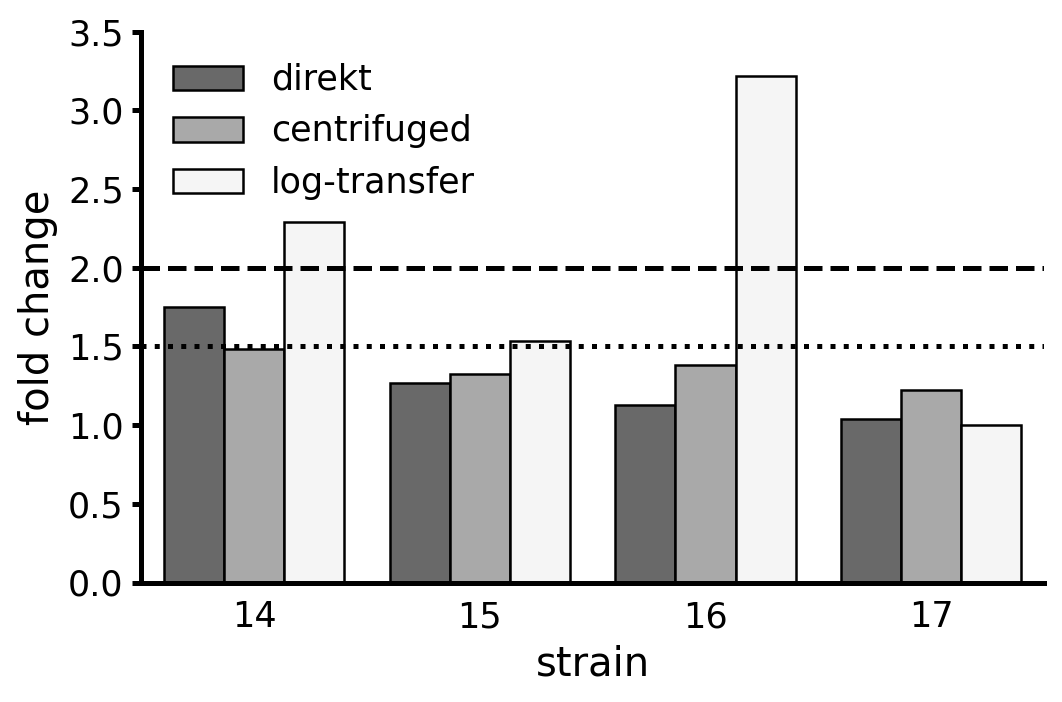

In [4]:
plt.close('all')
res = test[['strain', 'modus', 'fold']]
ax = sns.barplot(x=res['strain'], y=res['fold'], data=res, hue="modus",
                 edgecolor='k', color='white')
for i,thisbar in enumerate(ax.patches):
    #thisbar.set_hatch(pat[i])
    thisbar.set_color(greys[i])
    thisbar.set_edgecolor('k')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.tick_params(bottom=False)
plt.ylabel(r'fold change')
plt.xlabel('strain')
plt.ylim((0,3.5))
plt.legend()#handleheight=2.2, handlelength=4, loc='upper left')
plt.tight_layout()
plt.savefig('figures/special_screening/CGXII_screen_221019.png')

### Comparison of 24h of growth to 48h of growth

In [5]:
h_24 = pd.read_csv('data/CGXII_221116.csv')
h_48 = pd.read_csv('data/CGXII_221117.csv')
h_24

,short,14-1,14-2,14-3,15-1,15-2,15-3,16-1,16-2,16-3,17-1,17-2,17-3
0,+/-,0.153,0.160,0.135,0.057,0.076,0.071,0.128,0.174,0.135,0.080,0.081,0.083
1,+/+,0.128,0.195,0.156,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.069,0.048
2,+/++,NaN,NaN,NaN,0.199,0.149,0.198,0.112,0.100,0.111,NaN,NaN,NaN


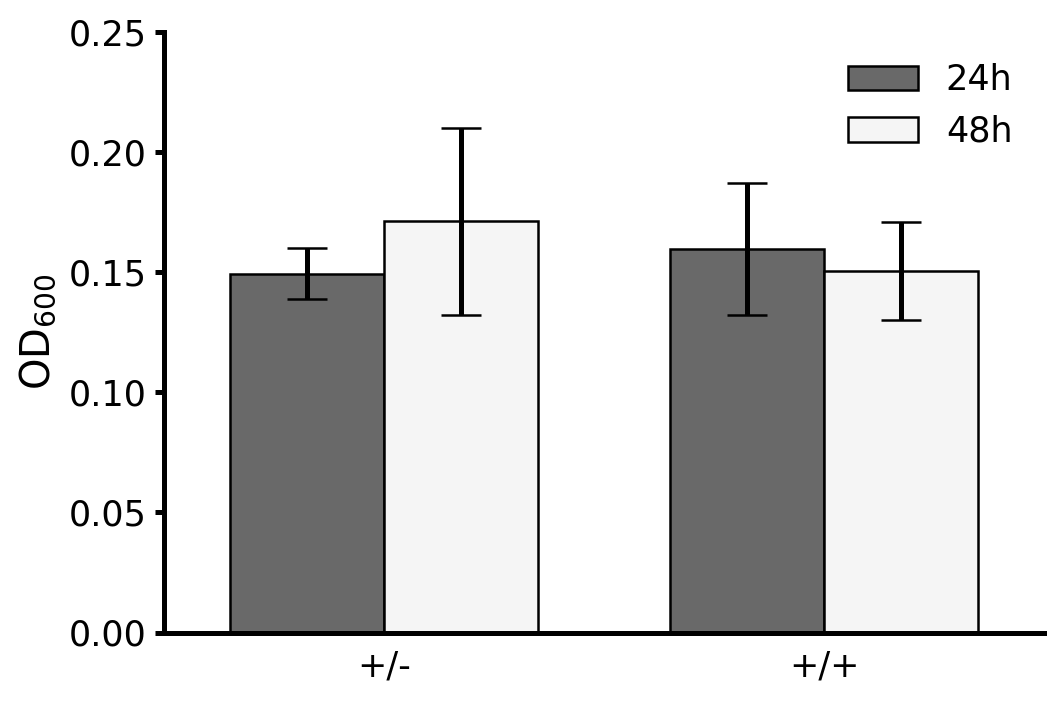

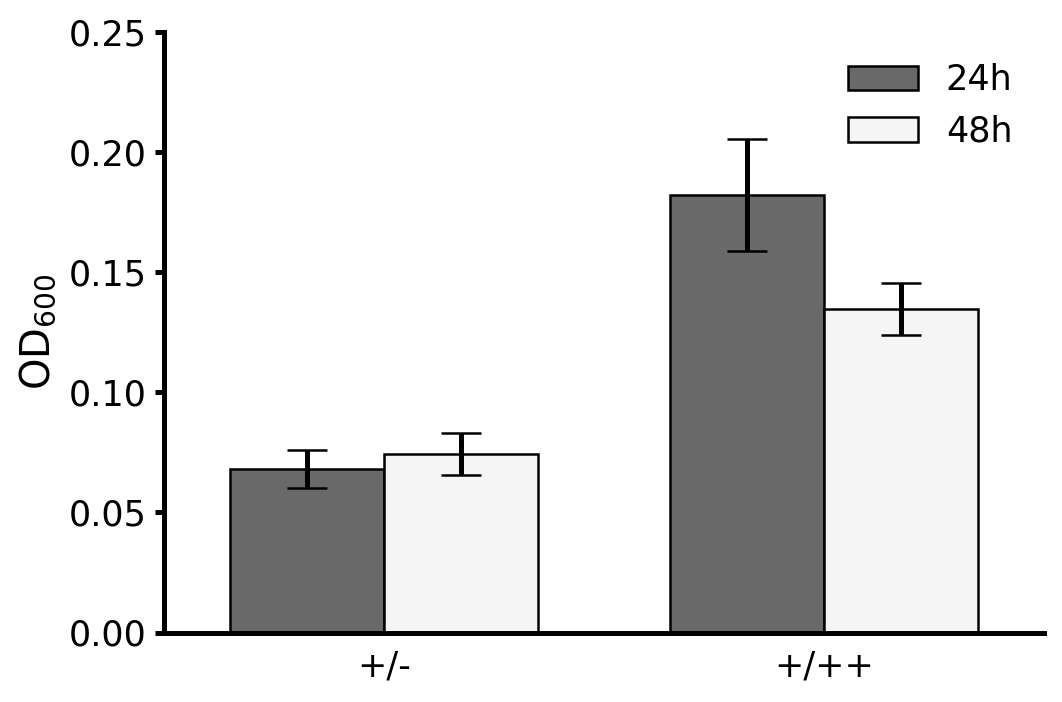

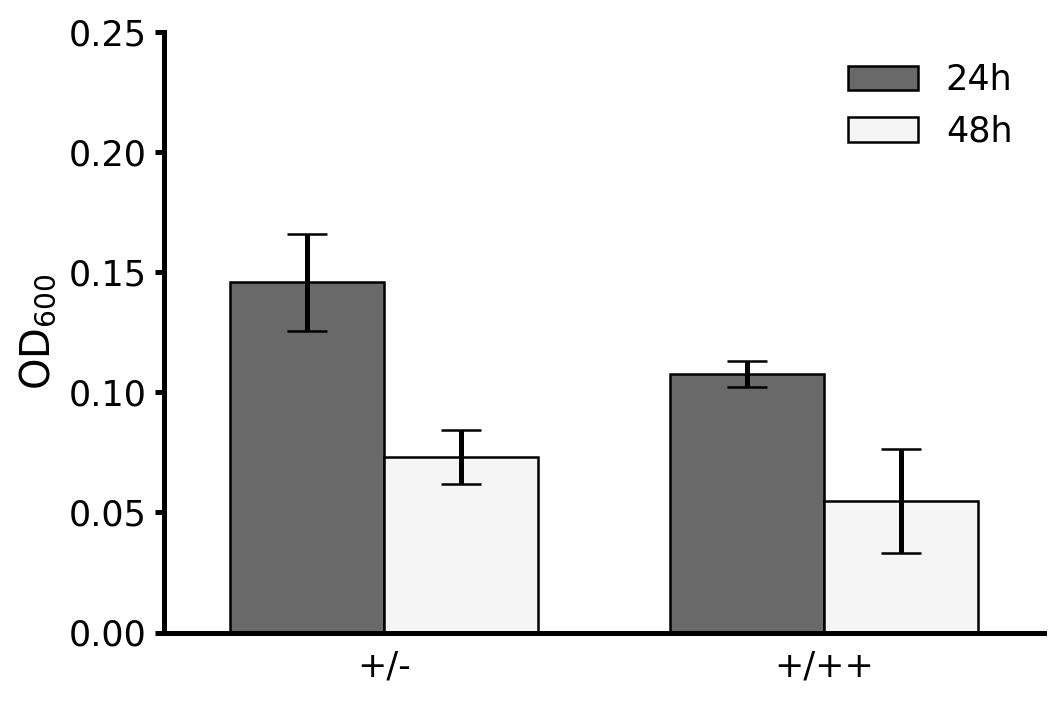

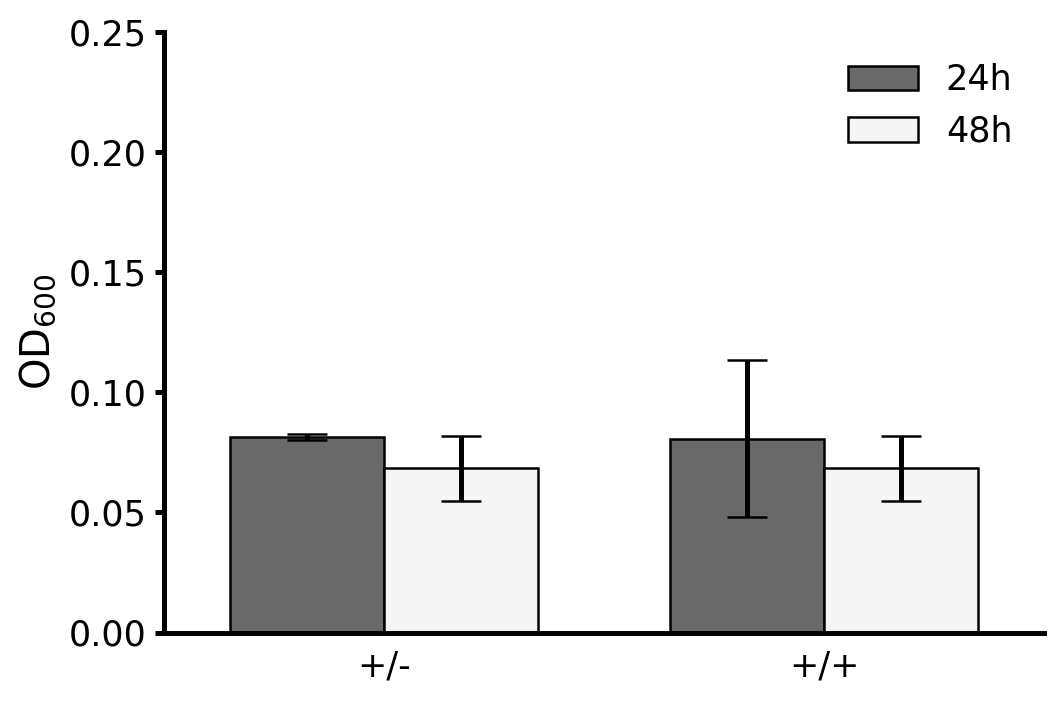

In [6]:

plt.close('all')
for strain in ['14', '15', '16', '17']:
    fig, ax = plt.subplots()
    h_1 = h_24[['short', strain +'-1', strain +'-2', strain +'-3']].dropna()
    h_2 = h_48[['short', strain +'-1', strain +'-2', strain +'-3']].dropna()
    h_1['mean'] = h_1.mean(axis=1)
    h_1_err = h_1.std(axis=1)
    h_2['mean'] = h_2.mean(axis=1)
    h_2_err = h_2.std(axis=1)
    ax.set_ylim((0,0.25))
    plt.tick_params(bottom=False)
    h_1.plot.bar('short','mean', yerr=h_1_err.values, rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],#'white',
                legend=False, ax=ax, position=1, width=0.35, label='24h')
    h_2.plot.bar('short','mean', yerr=h_2_err.values, rot=0, 
                edgecolor='k', #hatch=pat[0], 
                color=greys[8],#'white',
                legend=False, ax=ax, position=0, width=0.35, label='48h')
    plt.legend()#handleheight=2.5, handlelength=4, loc='upper left')
    plt.xlim((-0.5, len(h_1)-0.5))
    #plt.title(strain)
    plt.ylabel(r'OD$_{600}$')
    plt.xlabel('')
    plt.tight_layout()
    plt.savefig('figures/special_screening/CGXII_time_' + strain + '_221117.png')

### Comparison of different starting ODs and Tween

CGXII is supplemented with cobalt. 

23.11.22: Tween at concentration 0.2% and a starting OD of 0.1

In [7]:
res = pd.read_csv('data/CGXII_221123.csv')
res

,mode,14-0,14-24,15-0,15-24,16-0,16-24,17-0,17-24
0,dir-0dot1,0.100,0.040,0.093,0.000,0.116,0.069,0.111,0.000
1,dir-0dot3,0.000,0.283,0.255,0.156,0.337,0.416,0.301,0.184
2,dir-0dot1-Tween,0.094,0.151,0.106,0.047,0.116,0.080,0.108,0.066
3,log-0dot1,0.097,0.047,0.090,0.052,0.094,0.013,0.090,0.000
4,log-0dot3,0.274,0.426,0.245,0.210,0.307,0.529,0.258,0.121
5,log-0dot1-Tween,0.114,0.304,0.113,0.134,0.114,0.165,0.115,0.066


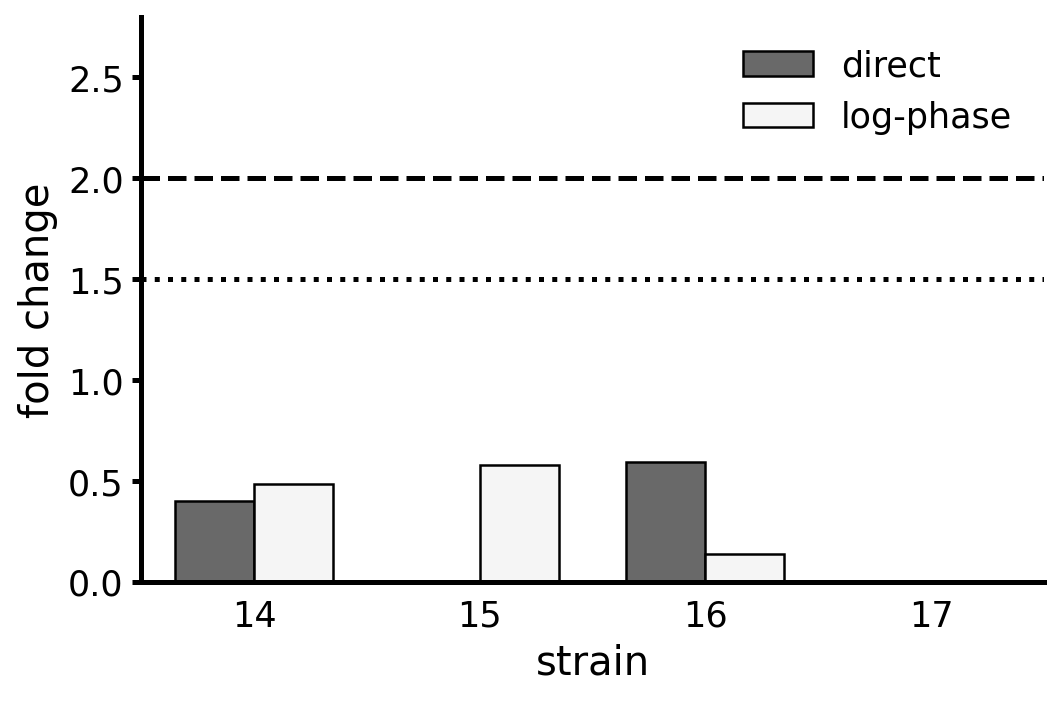

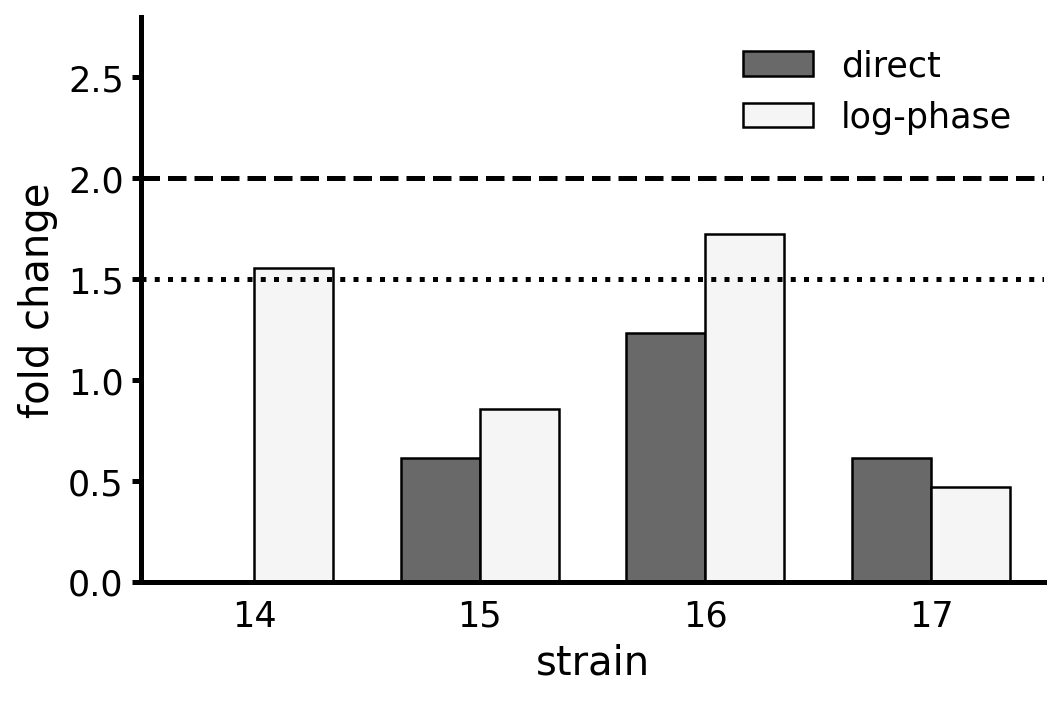

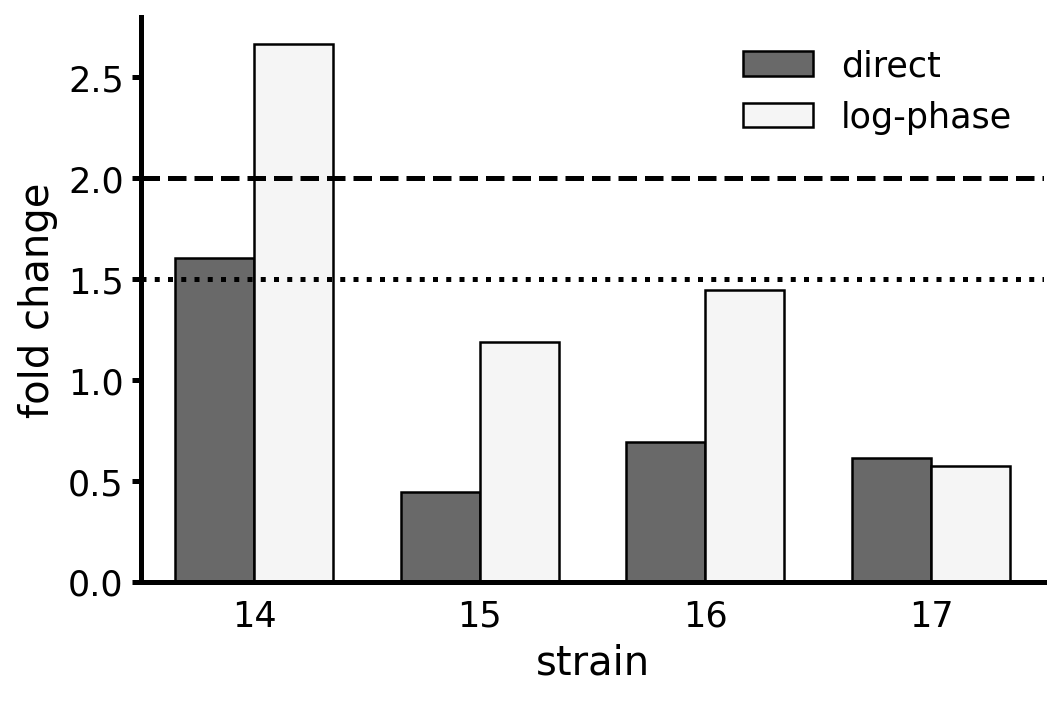

In [8]:
plt.close('all')
strains = ['14', '15', '16', '17']
for strain in strains:
    res[strain] = res[strain+'-24'] / res[strain+'-0']
    
folds = res[strains].T
folds.columns = res['mode']

for modus in ['-0dot1', '-0dot3', '-0dot1-Tween']:
    fig, ax = plt.subplots()
    vis = folds[['dir'+modus, 'log'+modus]].rename({'dir'+modus:'direct','log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('index', 'direct', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],
                legend=False, ax=ax, position=1, width=0.35)
    vis.plot.bar('index', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, position=0, width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    plt.ylim((0,2.8))
    plt.ylabel(r'fold change')
    plt.xlabel('strain')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('figures/special_screening/CGXII_transfer_' + modus[1:] + '_221123.png')

### Comparison of different transfer methods

CGXII is supplemented with cobalt.

In [9]:
trans = pd.read_csv('data/CGXII_221124.csv')
trans

,mode,14-0,14-24,15-0,15-24,16-0,16-24,17-0,17-24
0,dir-0dot1-noC,0.109,0.057,0.107,0.043,0.102,0.088,0.095,0.000
1,log-0dot2,0.182,0.271,0.173,0.174,0.193,0.278,0.177,0.027
2,log-0dot4,0.360,0.733,0.331,0.334,0.383,0.800,0.320,0.356
3,log-0dot1-noC,0.068,0.149,0.071,0.023,0.082,0.421,0.072,0.075


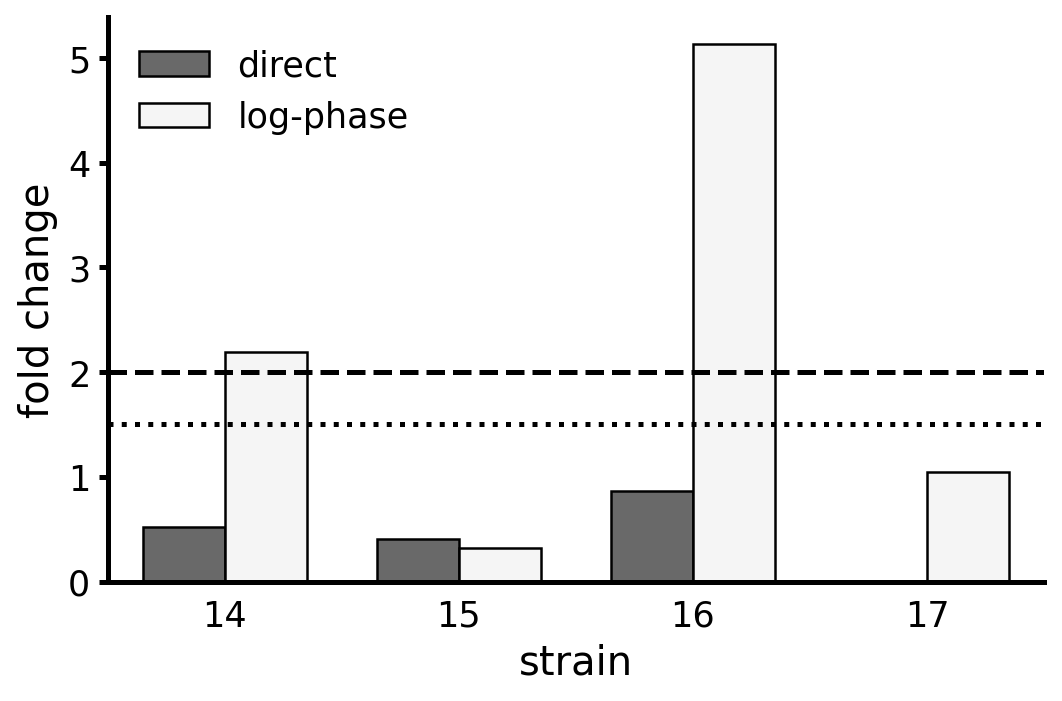

In [10]:
plt.close('all')
strains = ['14', '15', '16', '17']
for strain in strains:
    trans[strain] = trans[strain+'-24'] / trans[strain+'-0']
    
folds = trans[strains].T
folds.columns = trans['mode']

for modus in ['-0dot1-noC']: #-0dot2', '-0dot4', 
    fig, ax = plt.subplots()
    vis = folds[['dir'+modus, 'log'+modus]].rename({'dir'+modus:'direct','log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('index', 'direct', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],
                legend=False, ax=ax, position=1, width=0.35)
    vis.plot.bar('index', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, position=0, width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    #plt.ylim((0,2.8))
    plt.ylabel(r'fold change')
    plt.xlabel('strain')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('figures/special_screening/CGXII_transfer_' + modus[1:] + '_221124.png')

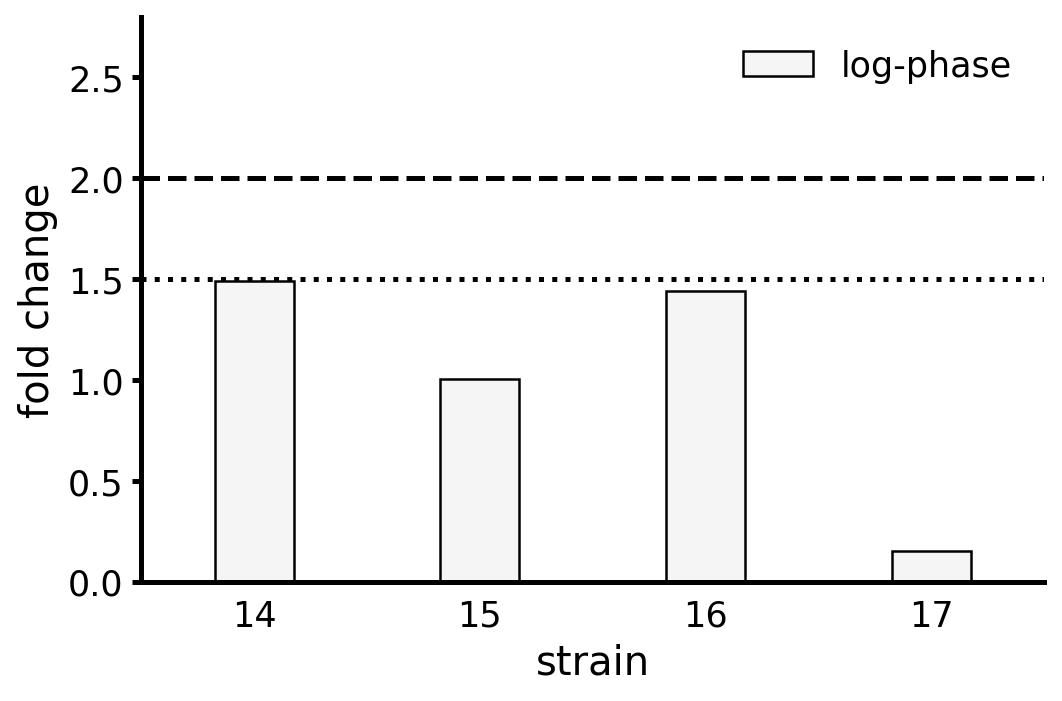

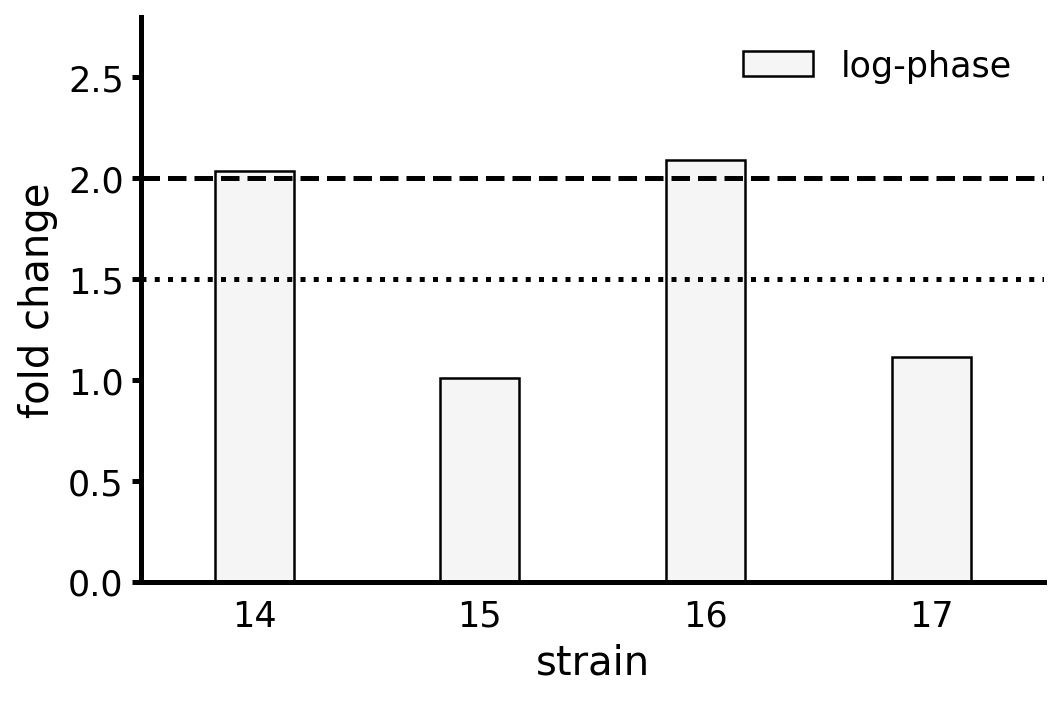

In [11]:
strains = ['14', '15', '16', '17']
for strain in strains:
    trans[strain] = trans[strain+'-24'] / trans[strain+'-0']
    
folds = trans[strains].T
folds.columns = trans['mode']

for modus in ['-0dot2', '-0dot4']:
    fig, ax = plt.subplots()
    vis = folds[['log'+modus]].rename({'log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('index', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, 
                #position=0, 
                width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    plt.ylim((0,2.8))
    plt.ylabel(r'fold change')
    plt.xlabel('strain')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('figures/special_screening/CGXII_transfer_' + modus[1:] + '_221124.png')

### Wide screening with Trace elements, Saccharose and Casamino acids

In [21]:
wide = pd.read_csv('data/CGXII_230124.csv')
strain = '15'
wide

,short,15-0-1,15-0-2,15-0-3,15-24-1,15-24-2,15-24-3
0,not c,0.093,0.099,0.093,0.076,0.084,0.084
1,+Trace not c,0.097,0.104,0.098,0.104,0.144,0.084
2,+Sacc not c,0.087,0.097,0.090,0.101,0.085,0.079
3,+CasA not c,0.090,0.106,0.098,0.683,1.225,0.843
4,c,0.175,0.188,0.172,0.285,0.315,0.293
5,+Trace c,0.170,0.191,0.174,0.285,0.321,0.299
6,+Sacc c,0.164,0.172,0.168,0.269,0.288,0.298
7,+CasA c,0.180,0.189,0.182,0.941,0.977,0.990


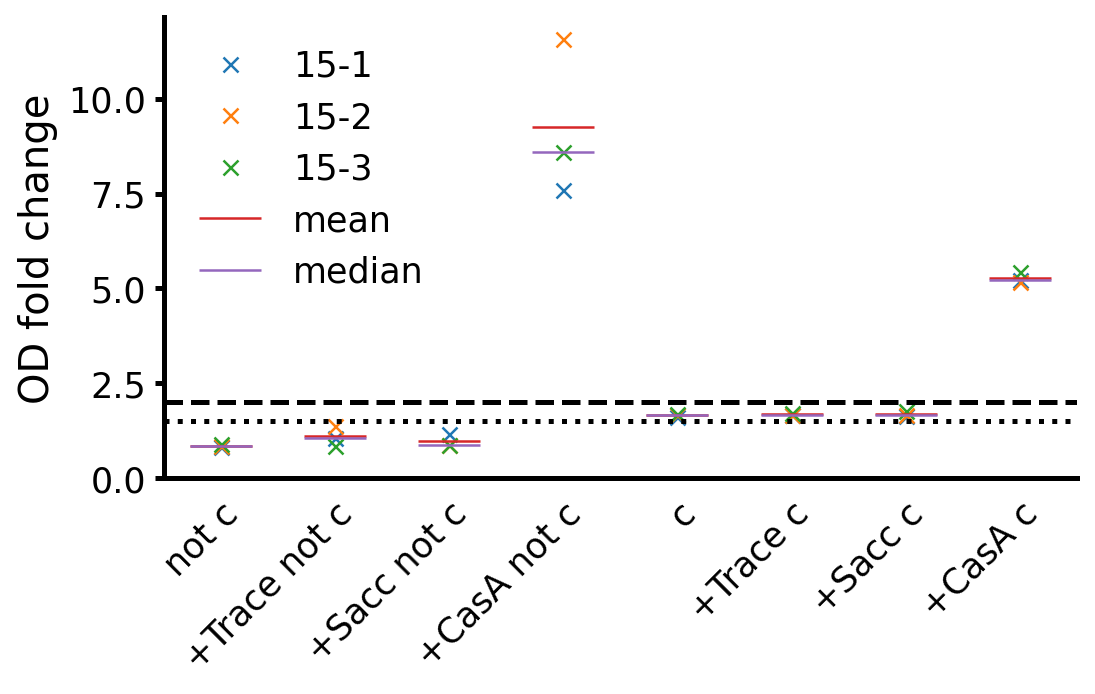

In [22]:
fig, ax = plt.subplots()
exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                    strain +'-0-2': strain + '-2',
                    strain +'-0-3': strain + '-3'}, axis=1)
exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                    strain +'-24-2': strain + '-2',
                    strain +'-24-3': strain + '-3'}, axis=1)
exp_fold = exp_24.div(exp_0)
exp_fold['short'] = wide[['short']]
exp_fold['mean'] = exp_fold.mean(axis=1)
exp_fold['median'] = exp_fold.drop('mean', axis=1).median(axis=1)
err = exp_fold.drop(['mean','median'], axis=1).std(axis=1)
exp_fold.drop(['mean','median'], axis=1).plot(ax=ax,style='x')
exp_fold[['mean','median']].plot(ax=ax,style="_",ms=25)
exp_fold.plot.bar('short','mean',color='white', rot=0, edgecolor='white', legend=False, ax=ax)
#plt.errorbar(exp_fold['short'],exp_fold['mean'], color='k', yerr=err, fmt='none')
ax.set_zorder(1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
#ax.set_ylim((0,10.5))
plt.tick_params(bottom=False)
plt.tight_layout()
plt.savefig('figures/special_screening/CGXII_'+ strain + '_230124.png')

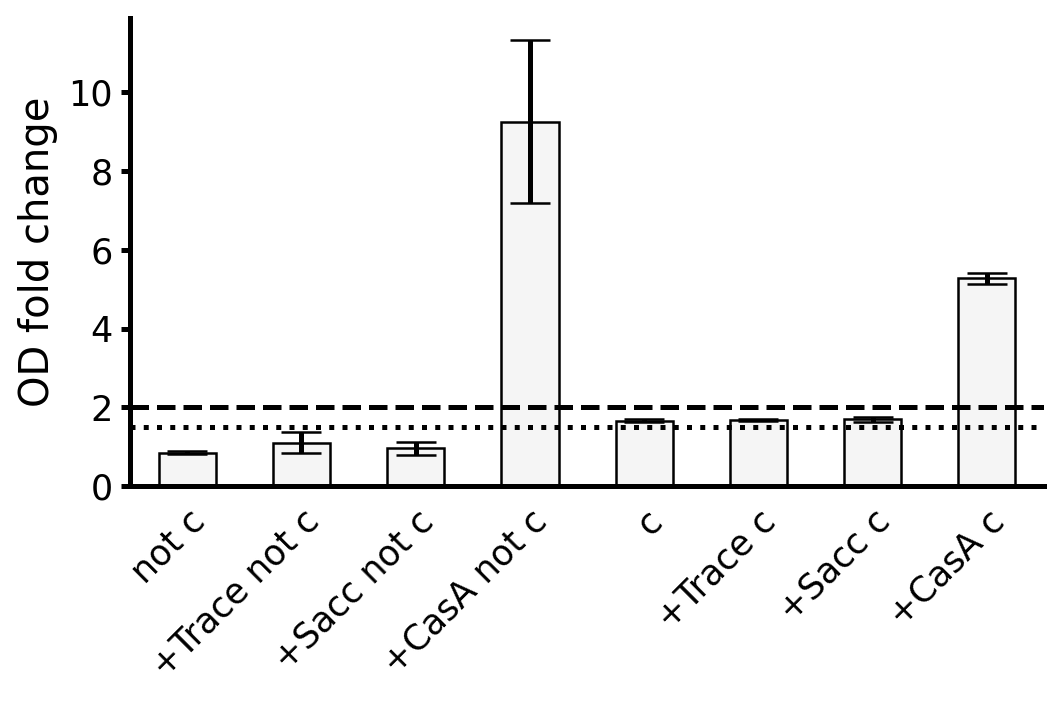

In [26]:
fig, ax = plt.subplots()
exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                    strain +'-0-2': strain + '-2',
                    strain +'-0-3': strain + '-3'}, axis=1)
exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                    strain +'-24-2': strain + '-2',
                    strain +'-24-3': strain + '-3'}, axis=1)
exp_fold = exp_24.div(exp_0)
exp_fold['short'] = wide[['short']]
exp_fold['mean'] = exp_fold.mean(axis=1)
exp_fold['median'] = exp_fold.drop('mean', axis=1).median(axis=1)
err = exp_fold.drop(['mean','median'], axis=1).std(axis=1)
#exp_fold.drop(['mean','median'], axis=1).plot(ax=ax,style='x')
#exp_fold[['mean','median']].plot(ax=ax,style="_",ms=25)
exp_fold.plot.bar('short','mean',color=greys[8], edgecolor='k', rot=0, legend=False, ax=ax)
plt.errorbar(exp_fold['short'],exp_fold['mean'], color='k', yerr=err, fmt='none')
ax.set_zorder(1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
#ax.set_ylim((0,10.5))
plt.tick_params(bottom=False)
plt.tight_layout()
#plt.savefig('figures/special_screening/CGXII_'+ strain + '_230124.png')

## Manual tests

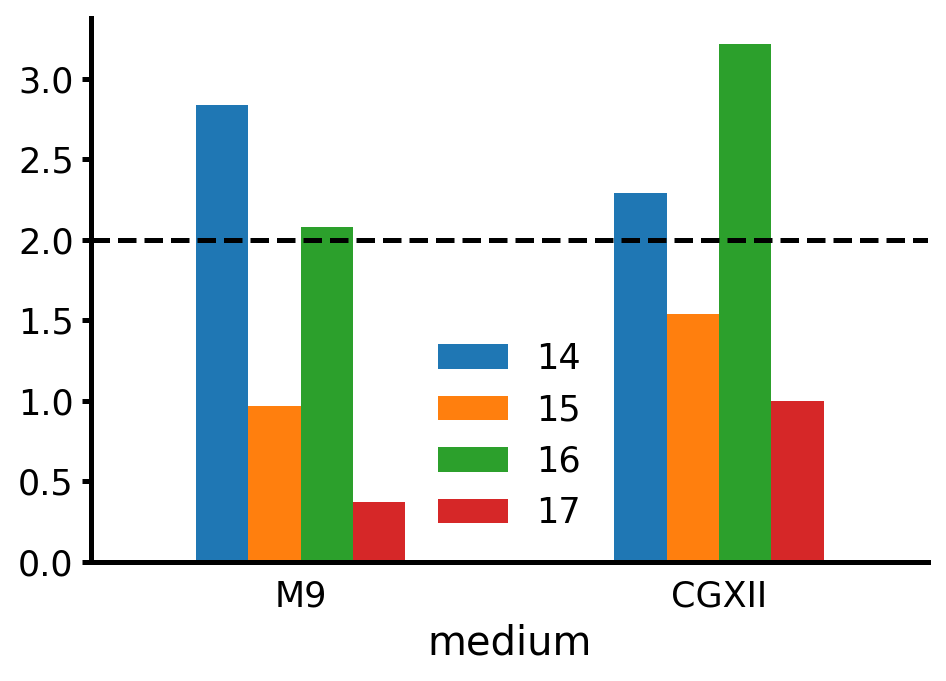

In [13]:
man = pd.read_csv('data/M9_CGXII_221019.csv')
strains = ['14', '15', '16', '17']
for strain in strains:
    man[strain] = man[strain+'-24'] / man[strain+'-0']
man.set_index('medium')[strains].plot.bar()
plt.axhline(2, linestyle='dashed', color='k')
plt.xticks(rotation=0)
plt.tick_params(bottom=False)

# Test on M9

In [225]:
wide = pd.read_csv('data/M9_230203.csv')
wide

,short,14-0-1,14-0-2,14-0-3,14-24-1,14-24-2,14-24-3,15-0-1,15-0-2,15-0-3,...,16-0-3,16-24-1,16-24-2,16-24-3,17-0-1,17-0-2,17-0-3,17-24-1,17-24-2,17-24-3
0,M9,0.229,0.218,0.205,0.388,0.397,0.408,0.225,0.227,0.211,...,0.256,0.405,0.443,0.417,0.256,0.214,0.224,0.594,0.297,0.772
1,+CasA,0.235,0.233,0.206,2.630,1.740,1.720,0.210,0.329,0.213,...,0.286,1.760,2.190,2.120,0.228,0.214,0.219,1.590,1.270,2.360


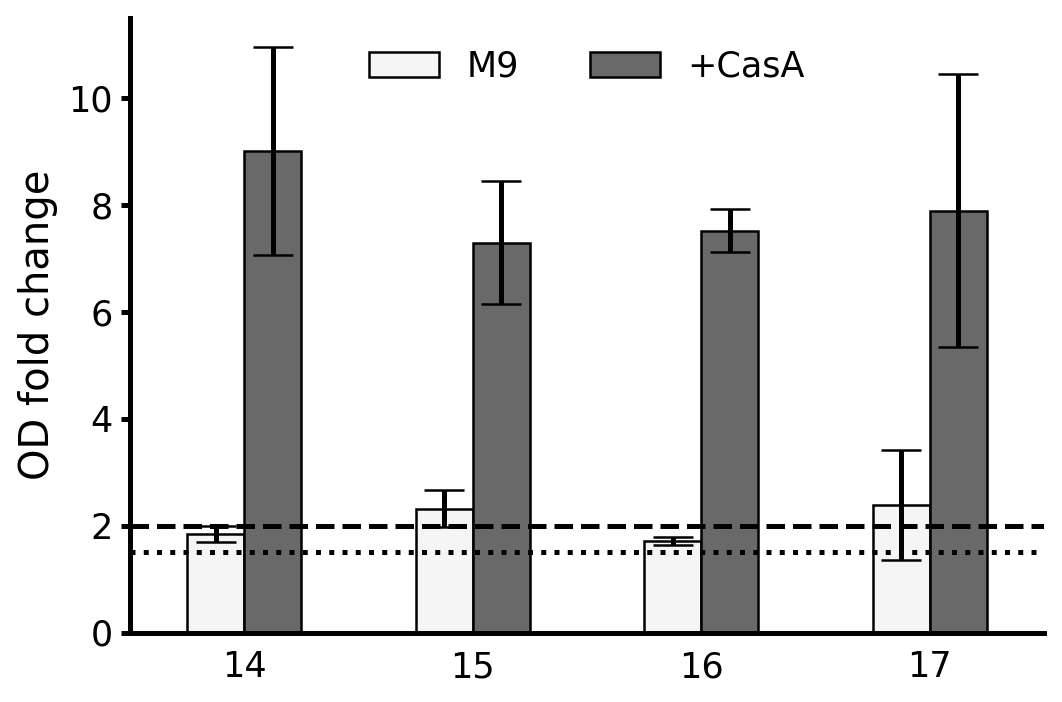

In [232]:
strains = ['14', '15', '16', '17']
all = {}
err = {}
for strain in strains:
    exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
    exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
    exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                        strain +'-0-2': strain + '-2',
                        strain +'-0-3': strain + '-3'}, axis=1)
    exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                        strain +'-24-2': strain + '-2',
                        strain +'-24-3': strain + '-3'}, axis=1)
    exp_fold = exp_24.div(exp_0)
    all[strain] = exp_fold.mean(axis=1)
    err[strain] = exp_fold.std(axis=1)
all = pd.DataFrame.from_dict(all).rename({0:'M9', 1:'+CasA'}, axis=0)
err = pd.DataFrame.from_dict(err).rename({0:'M9', 1:'+CasA'}, axis=0)
all.T.plot.bar(yerr=err.T, color={'M9':greys[8],'+CasA':greys[0]}, edgecolor='k')
plt.xticks(rotation=0, rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
plt.tick_params(bottom=False)
plt.legend(ncol=2)
plt.tight_layout()

## T-test in Python

Student's t tests were used to calculate the significance: ns= not significant, * P <0.05, ** P <0.01, *** P <0.001. 

In [233]:
from scipy.stats import ttest_ind

for strain in strains:
    exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
    exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
    exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                        strain +'-0-2': strain + '-2',
                        strain +'-0-3': strain + '-3'}, axis=1)
    exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                        strain +'-24-2': strain + '-2',
                        strain +'-24-3': strain + '-3'}, axis=1)
    exp_fold = exp_24.div(exp_0)
    t_stat, p = ttest_ind(exp_fold.loc[0],exp_fold.loc[1])
    print(strain, f't={t_stat}, p={p}')

14 t=-6.361397315958601, p=0.0031302513256424355
15 t=-7.203398098391621, p=0.0019686402914816693
16 t=-24.65173269644844, p=1.606986109631127e-05
17 t=-3.471093099771839, p=0.025558176151134895


There is a Python tool called `statannotations` which uses scipy.stats for the calculations and simplifies adding significance bars to seaborn plots.

The first step is to transform the `.csv` data into a pandas Dataframe that can be used for seaborn plotting and statistics. I reordered the Dataframe and split the sample description so that we end up with strain, time point and sample information in three different columns. From there we can bild two dataframes: one for time point 0 and one for time point 24 hours. The OD values can be divided so that we end up with a Dataframe holding the information on OD fold changes. This way we also wont have to worry about error calculation since the error is inferred from the fold change and not from averaging before.

In [228]:
# data preparation
new = pd.DataFrame(wide.set_index('short').sort_index().T.stack()).reset_index().rename({0:'OD'}, axis=1)
new[['strain', 'time', 'sample']] = new.level_0.str.split('-', expand=True)
time = [v for k, v in new.groupby('time')]
change = time[1]
change['OD fold change'] = time[1]['OD'].values / time[0]['OD'].values
change

,level_0,short,OD,strain,time,sample,OD fold change
6,14-24-1,+CasA,2.630,14,24,1,11.191489
7,14-24-1,M9,0.388,14,24,1,1.694323
8,14-24-2,+CasA,1.740,14,24,2,7.467811
9,14-24-2,M9,0.397,14,24,2,1.821101
10,14-24-3,+CasA,1.720,14,24,3,8.349515
11,14-24-3,M9,0.408,14,24,3,1.990244
18,15-24-1,+CasA,1.710,15,24,1,8.142857
19,15-24-1,M9,0.466,15,24,1,2.071111
20,15-24-2,+CasA,1.970,15,24,2,5.987842
21,15-24-2,M9,0.614,15,24,2,2.704846


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15_M9 vs. 15_+CasA: t-test independent samples, P_val:1.969e-03 t=-7.203e+00
14_M9 vs. 14_+CasA: t-test independent samples, P_val:3.130e-03 t=-6.361e+00
16_M9 vs. 16_+CasA: t-test independent samples, P_val:1.607e-05 t=-2.465e+01
17_M9 vs. 17_+CasA: t-test independent samples, P_val:2.556e-02 t=-3.471e+00


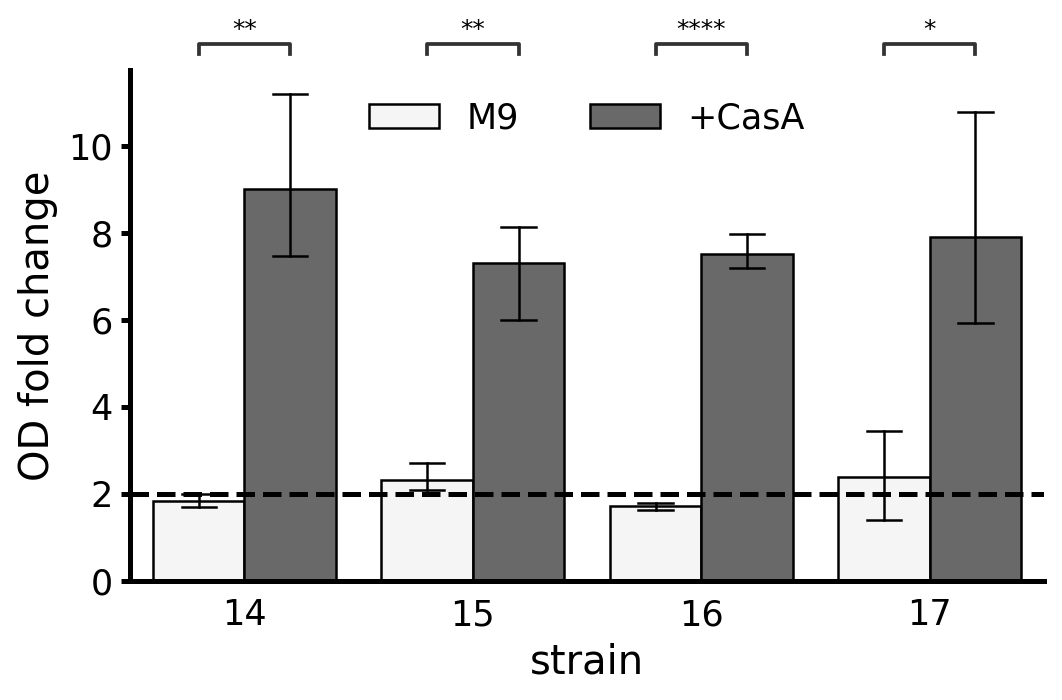

In [234]:
# input
data=change
hue = 'short'
hue_order = ['M9', '+CasA']
x='strain'
y='OD fold change'

# barplot
ax = sns.barplot(data=data, x=x, y=y, hue=hue, 
                 estimator=np.mean, 
                 hue_order=hue_order,
                 palette=[greys[8], greys[0]], edgecolor='k',
                 capsize=.15, errwidth=1, errcolor='k')

# statistics
pairs = []
pairs = pairs + [((strain, 'M9'), (strain, '+CasA'))
                for strain in strains]
#pairs = pairs + [(('14', '+CasA'), ('16','+CasA'))]
annotator = Annotator(ax, pairs, data=data, x=x, y=y, hue=hue, hue_order=hue_order)
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_test().annotate()

# styling
ax.legend(title=None, ncol=2)
ax.tick_params(bottom=False) 
ax.axhline(2, linestyle='dashed', color='k')
#ax.axhline(1.5, linestyle=':', color='k')

# saving
plt.tight_layout()
plt.savefig('figures/plots_with_stats/M9_cas.png')

In [235]:
plt.close('all')